In [1]:
import pandas as pd

print ('Install stumpy')
!pip install stumpy

Install stumpy
     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:

import numpy as np
import stumpy

your_time_series = np.random.rand(10)
window_size = 3  # Approximately, how many data points might be found in a pattern

matrix_profile = stumpy.stump(your_time_series, m=window_size)

In [3]:

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import urllib.request
import ssl
import io
import os

    0
0  32
1  65
2  70
3  10
4  20
5  22
6  87
7  90
8  30


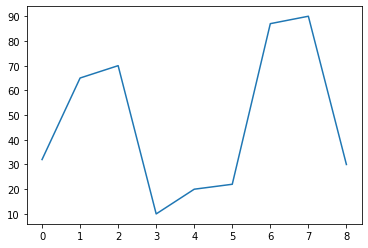

In [4]:
import pandas as pd
df1=pd.DataFrame({30,20,10,32,10,20,70,65,22,87,90,30,20,10,32,10,20,70,65,22,87,90,30,20,10,32,10,20,70,65,22,87,90,30,20,10,32,10,20,70,65,22,87,90,30,20,10,32,10,20,70,65,22,87,90})

print (df1)
plt.plot(df1)

    0
0  10
1  42
2  50
3  23
4  30


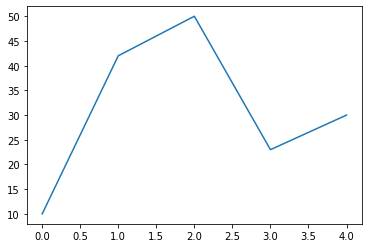

In [6]:
df2=pd.DataFrame({10,10,30,42,50,23,10,10,30,42,50,23,10,10,30,42,50,23,10,10,30,42,50,23})
print (df2)
plt.plot(df2)

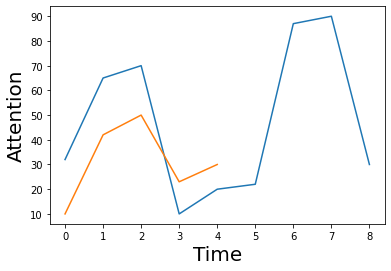

In [7]:
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Attention', fontsize='20')
plt.plot(df1)
plt.plot(df2)
#plt.text(2, 30, 'Attention', color="black", fontsize=20)
ax = plt.gca()
plt.show()

In [8]:
df1['attention'] = df1[0].astype(float)
df2['attention'] = df2[0].astype(float)

df1['zattention']= stumpy.core.z_norm(df1['attention'].values)

df2['zattention']= stumpy.core.z_norm(df2['attention'].values)


print (df1['zattention'])
print (df2['zattention'])


print (df1['attention'])
print (df2['attention'])


distance_profile = stumpy.core.mass(df2['attention'], df1['attention'])

z_distance_profile = stumpy.core.mass(df2['zattention'], df1['zattention'])

0   -0.529822
1    0.610447
2    0.783215
3   -1.290001
4   -0.944465
5   -0.875358
6    1.370626
7    1.474287
8   -0.598929
Name: zattention, dtype: float64
0   -1.493915
1    0.782527
2    1.351637
3   -0.569110
4   -0.071139
Name: zattention, dtype: float64
0    32.0
1    65.0
2    70.0
3    10.0
4    20.0
5    22.0
6    87.0
7    90.0
8    30.0
Name: attention, dtype: float64
0    10.0
1    42.0
2    50.0
3    23.0
4    30.0
Name: attention, dtype: float64


In [9]:
idx = np.argmin(distance_profile)

print(f"The nearest neighbor to `df2` is located at index {idx} in `df1`")

The nearest neighbor to `df2` is located at index 0 in `df1`


In [10]:
print (distance_profile)
print (z_distance_profile)

[1.56932301 3.65320798 3.96963018 3.38387223 2.59906879]
[1.56932301 3.65320798 3.96963018 3.38387223 2.59906879]


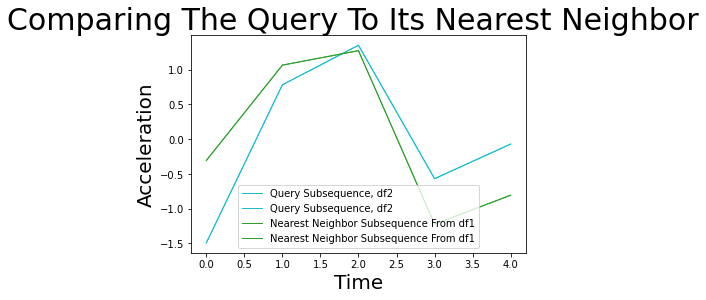

In [ ]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
Q_z_norm = stumpy.core.z_norm(df2.values)
T_z_norm = stumpy.core.z_norm(df1.values[idx:idx+len(df2)])

plt.suptitle('Comparing The Query To Its Nearest Neighbor', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(Q_z_norm, lw=1, color="C9", label="Query Subsequence, df2")
plt.plot(T_z_norm, lw=1, color="C2",label="Nearest Neighbor Subsequence From df1")
plt.legend()
plt.show()

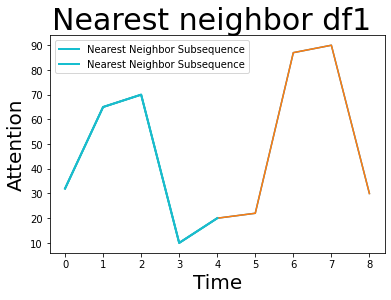

In [ ]:

plt.suptitle('Nearest neighbor df1', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Attention', fontsize='20')
plt.plot(df1)
plt.plot(range(idx, idx+len(df2)), df1.values[idx:idx+len(df2)], lw=2, color="C9",label="Nearest Neighbor Subsequence")
plt.legend()
plt.show()

[0 1 5 3 4]
[5 0 4 3 1]


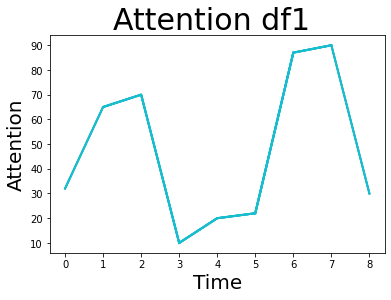

In [ ]:
k = 5
idxs = np.argpartition(distance_profile, k)[:k]
print (idxs)

idxs = idxs[np.argsort(distance_profile[idxs])]

print (idxs)

plt.suptitle('Attention df1', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Attention', fontsize='20')
plt.plot(df1)

for idx in idxs:
    plt.plot(range(idx, idx+len(df2)), df1.values[idx:idx+len(df2)], lw=2,color="C9")
plt.show()